# LSTM dropout comparison

Dropout is found to be the preferred regularization technique for neural networks. This notebook investigates the appropriate dropout rate for LSTM models 

In [1]:
# %load 3_lstm_dout_comp.py
import src.core as mlModule
import src.core_configs as configs

Using TensorFlow backend.


In [2]:
def initTrainPredict(modelList, retrain=False, plot=True, score=True):
    mlModule.initModels(modelList)
    mlModule.trainModels(retrain)
    
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlModule.predictWithModels(
        plot=plot,
        score=score,
    )

In [3]:
def pred(facility, model, resolution):
    filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig(facility, model, resolution)

    df = mlModule.initDataframe(filename, columns, irrelevantColumns)
    df_train, df_test = mlModule.getTestTrainSplit(traintime, testtime)
    X_train, y_train, X_test, y_test = mlModule.getFeatureTargetSplit(targetColumns)

    lstm_1_1 = mlModule.LSTM('LSTM 1x128 d0.0'+' mod'+model, layers=[128], dropout=0.0, recurrentDropout=0.0, epochs=5000)
    lstm_1_2 = mlModule.LSTM('LSTM 1x128 d0.1'+' mod'+model, layers=[128], dropout=0.1, recurrentDropout=0.1, epochs=5000)
    lstm_1_3 = mlModule.LSTM('LSTM 1x128 d0.2'+' mod'+model, layers=[128], dropout=0.2, recurrentDropout=0.2, epochs=5000)
    lstm_1_4 = mlModule.LSTM('LSTM 1x128 d0.3'+' mod'+model, layers=[128], dropout=0.3, recurrentDropout=0.3, epochs=5000)
    lstm_1_5 = mlModule.LSTM('LSTM 1x128 d0.4'+' mod'+model, layers=[128], dropout=0.4, recurrentDropout=0.4, epochs=5000)
    lstm_1_6 = mlModule.LSTM('LSTM 1x128 d0.5'+' mod'+model, layers=[128], dropout=0.5, recurrentDropout=0.5, epochs=5000)
    linear = mlModule.Linear_Regularized('Linear rCV mod'+model)

    initTrainPredict([
        linear, lstm_1_1, lstm_1_2, lstm_1_3, lstm_1_4, lstm_1_5, lstm_1_6,
    ])

# Dataset G, predictive model A, 30min

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 4232 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.26106655 -0.18036607 -0.74340497 -0.26854008]]
Model LSTM 1x128 

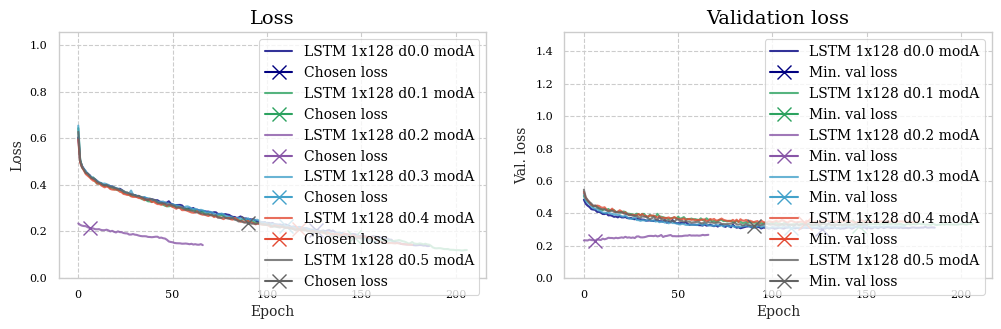

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
|   Linear rCV modA    |    0.562    |  -1.2036   |
| LSTM 1x128 d0.0 modA |    0.8732   |  -1.2504   |
| LSTM 1x128 d0.1 modA |    0.886    |  -1.3787   |
| LSTM 1x128 d0.2 modA |    0.8797   |  -1.4088   |
| LSTM 1x128 d0.3 modA |    0.8615   |  -1.1195   |
| LSTM 1x128 d0.4 modA |    0.8582   |  -1.6033   |
| LSTM 1x128 d0.5 modA |    0.8498   |  -1.2705   |
+----------------------+-------------+------------+


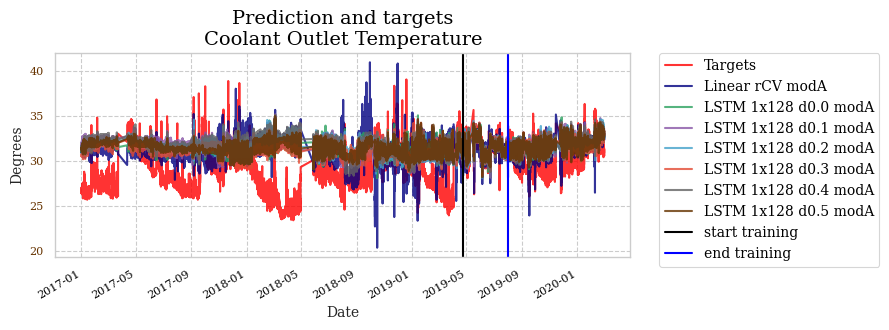

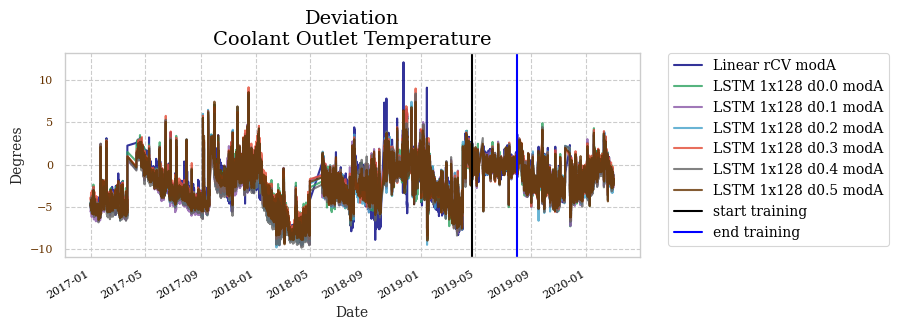

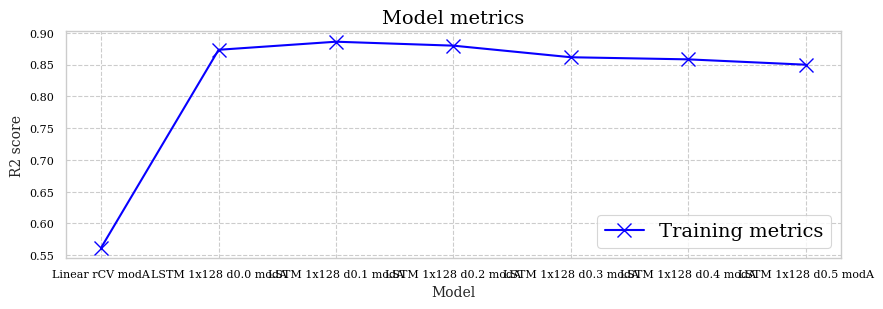

In [4]:
pred('G', 'A', '30min')

In [5]:
mlModule.reset()

# Dataset G, predictive model A, 10min

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-24 00:00:00 and 2019-08-01 00:00:00
Found 12669 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 146747 rows

Training model Linear rCV modA
    Trained weights for Linear rCV modA:
[[ 0.44055959 -0.10965738 -0.5984729  -0.18527174]]
Model LSTM 1x12

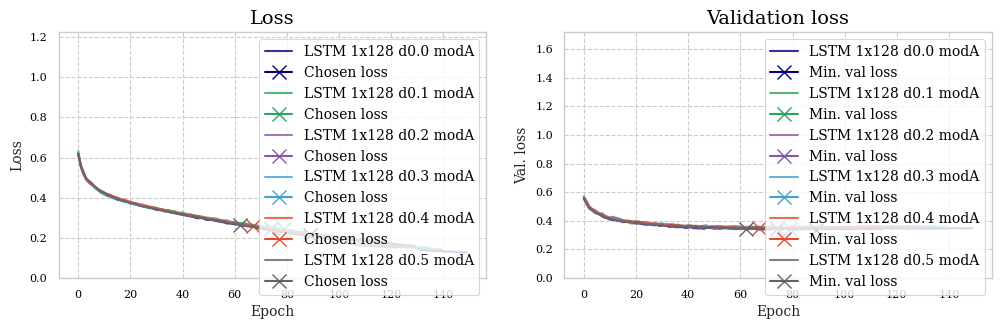

Model prediction scores
+----------------------+-------------+------------+
|        Model         | Train score | Test score |
+----------------------+-------------+------------+
|   Linear rCV modA    |    0.4717   |   -1.251   |
| LSTM 1x128 d0.0 modA |     0.86    |  -1.4079   |
| LSTM 1x128 d0.1 modA |    0.8378   |  -1.7739   |
| LSTM 1x128 d0.2 modA |    0.8278   |  -1.4519   |
| LSTM 1x128 d0.3 modA |    0.8264   |   -1.385   |
| LSTM 1x128 d0.4 modA |    0.8244   |  -1.5793   |
| LSTM 1x128 d0.5 modA |    0.8242   |  -1.5315   |
+----------------------+-------------+------------+


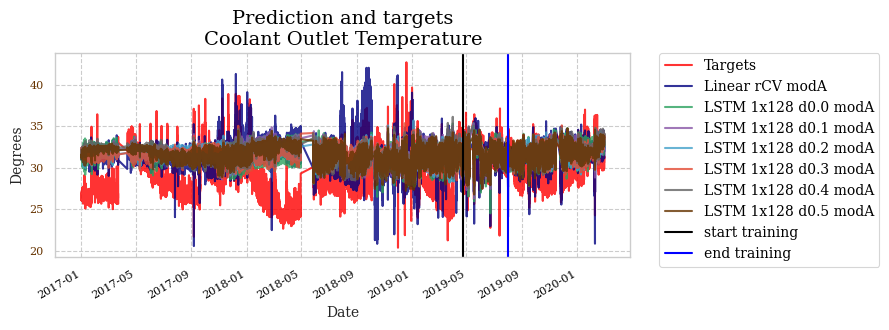

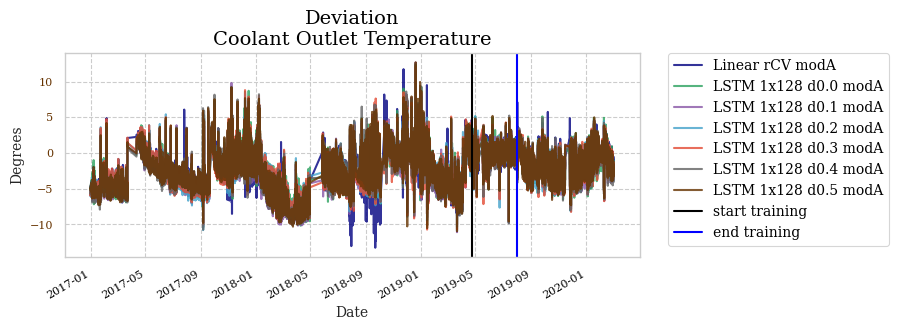

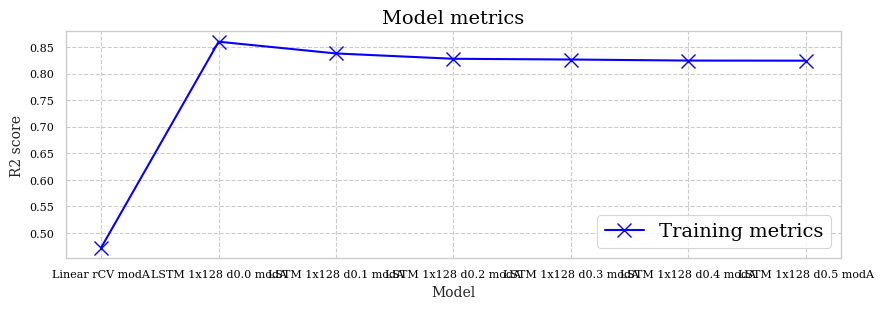

In [6]:
pred('G', 'A', '10min')

In [7]:
mlModule.reset()

# Conclusions
Dataset G is used with sampling rates of 30 and 10 minutes and predictive model A. The architecture is chosen as one hidden layer of 128 neurons for each model to ensure sufficient model capacity with acceptable training time. The same level of regular dropout and recurrent dropout is added for each model.

Comparable performance is found between different dropout rates for both sampling resolutions. In fact, the different rates are found to converge to very similar solutions. The calculated validation loss is generally low, however particularly so for the model using a dropout rate of 0.2. Somewhat surprisingly, the model using no dropout only obtains a slightly lower minimum loss than the remaining models. This indicates that the model is not able to overfit the data to any extended degree despite lack of regularization, at least within the limited number of epochs allowed before early stopping aborts the training process. However, this does not necessarily mean that the model would not overfit further given additional training epochs.

Some notable differences are observed around timestamp 2018.05. The models otherwise predict roughly the same values with the same degree of variation. Predictions in general have fewer large variations than the linear model. It is concluded that a dropout rate of 0.2 is preferred, as this ensures the best compromise between model performance and speed of convergence.